```
QUERYNAME = CholesterolMSMS;
DEFINE PR = 'C[41..49] H[30..200] O[2] N[1]' WITH DBR = (4.5,10.5), CHG = +1;
DEFINE FR ='C[27] H[45]' WITH DBR = (1,8), CHG = +1;

IDENTIFY

	PR IN MS1+ AND
	FR in MS2+

SUCHTHAT
	(avg(FR.intensity)/avg(PR.intensity) >=0.1 AND avg(FR.intensity)/avg(PR.intensity) <=10) AND
	PR.chemsc[C]/PR.chemsc[db] >= 4.6

REPORT 

	SPECIE = "CE %d:%d" % "((PR.chemsc)[C] - 27, (PR.chemsc)[db] - 4.5)";  
	CLASS = "CE";
	MASS = PR.mass;
	ISOBARIC = PR.isobaric;
	CHEMSC = PR.chemsc;
	ERRppm = "%2.2f" % "(PR.errppm)";
	FRERRppm = "%2.2f" % "(FR.errppm)";
	INT = FR.intensity;
	QUALA = PR.intensity;
```

In [2]:
from targets import Targets_util
from MS_reader import SpectraUtil
from mfql_Parser import parser

In [ ]:
parser.parse()

In [102]:
QUERYNAME = 'CholesterolMSMS'

In [103]:
elements = {'C':(41,49),'H':(30,200),'O':(2,2),'N':(1,1),'P':(1,1) }      
PR = MFQL_util(elements)
PR.set_dbr(4.5,10.5)

In [104]:
elements = {'C':(27,27),'H':(45,45) }      
FR = MFQL_util(elements)
FR.set_dbr(1,8)

In [105]:
FR._df.chem

0    C27 H45
Name: chem, dtype: object

In [106]:
filename = '..\\test_resources\\small_test\\190321_Serum_Lipidextract_368723_01.mzML'
spectraUtil = SpectraUtil.fromFile(filename, test_sample=True)

MS1 = spectraUtil
MS2 = spectraUtil.get_reset_copy()
MS1.set_mode()
MS1.set_ms_level()
MS2.set_mode()
MS2.set_ms_level(2)


In [108]:
MS1_match = MS1.get_nearest(PR._df)
MS2_match = MS2.get_nearest(FR._df)

find the nearest Peaks to the target_peaks with a tolerance of 0.01
find the nearest Peaks to the target_peaks with a tolerance of 0.01


## get only the nearest peak in each scan

In [109]:
MS1_match.shape

(302, 12)

In [110]:
MS1_match = MFQL_util.set_max_ppm(MS1_match, max_ppm = 100)
MS2_match = MFQL_util.set_max_ppm(MS2_match, max_ppm = 100)

In [111]:
MS1_match.columns

Index(['id', 'm', 'i', 'index', 'C', 'H', 'O', 'N', 'P', 'dbr', 'chem',
       'target', 'ppm'],
      dtype='object')

In [112]:
MS1_match.shape

(296, 13)

In [113]:
all_match = MFQL_util.makeAllCombo(MS1_match, MS2_match)

In [114]:
all_match.columns

Index(['PR_id', 'PR_m', 'PR_i', 'PR_index', 'PR_C', 'PR_H', 'PR_O', 'PR_N',
       'PR_P', 'PR_dbr', 'PR_chem', 'PR_target', 'PR_ppm', 'FR_id', 'FR_m',
       'FR_i', 'FR_index', 'FR_C', 'FR_H', 'FR_dbr', 'FR_chem', 'FR_target',
       'FR_ppm'],
      dtype='object')

In [115]:
# # (avg(FR.intensity)/avg(PR.intensity) >=0.1 AND avg(FR.intensity)/avg(PR.intensity) <=10) AND
# 	PR.chemsc[C]/PR.chemsc[db] >= 4.6

ST = all_match.query('FR_i/PR_i >= 0.1 and FR_i/PR_i <= 10 and PR_C/PR_dbr >= 4.6')

# make it a summary like the current lx, 
# one entry one line


In [116]:
pr_df, fr_df = Targets_util.devideAllCombo(ST)

In [117]:
pr_df[pr_df.PR_chem== 'C41 H76 O2 N1 P1']

,PR_id,PR_m,PR_i,PR_index,PR_C,PR_H,PR_O,PR_N,PR_P,PR_dbr,PR_chem,PR_target,PR_ppm
784,controllerType=0 controllerNumber=1 scan=8,645.561218,84917.601562,46.0,41.0,76.0,2.0,1.0,1.0,4.5,C41 H76 O2 N1 P1,645.56134,0.189092
703,controllerType=0 controllerNumber=1 scan=22,645.559509,154247.328125,46.0,41.0,76.0,2.0,1.0,1.0,4.5,C41 H76 O2 N1 P1,645.56134,2.836376
730,controllerType=0 controllerNumber=1 scan=21,645.559509,153122.875000,46.0,41.0,76.0,2.0,1.0,1.0,4.5,C41 H76 O2 N1 P1,645.56134,2.836376
757,controllerType=0 controllerNumber=1 scan=17,645.559509,255222.156250,46.0,41.0,76.0,2.0,1.0,1.0,4.5,C41 H76 O2 N1 P1,645.56134,2.836376
676,controllerType=0 controllerNumber=1 scan=14,645.559387,237835.984375,46.0,41.0,76.0,2.0,1.0,1.0,4.5,C41 H76 O2 N1 P1,645.56134,3.025468
650,controllerType=0 controllerNumber=1 scan=20,645.559326,468750.468750,46.0,41.0,76.0,2.0,1.0,1.0,4.5,C41 H76 O2 N1 P1,645.56134,3.120014
623,controllerType=0 controllerNumber=1 scan=13,645.559265,627203.062500,46.0,41.0,76.0,2.0,1.0,1.0,4.5,C41 H76 O2 N1 P1,645.56134,3.214559
596,controllerType=0 controllerNumber=1 scan=11,645.559204,516790.125000,46.0,41.0,76.0,2.0,1.0,1.0,4.5,C41 H76 O2 N1 P1,645.56134,3.309105
569,controllerType=0 controllerNumber=1 scan=24,645.559143,408192.218750,46.0,41.0,76.0,2.0,1.0,1.0,4.5,C41 H76 O2 N1 P1,645.56134,3.403651
515,controllerType=0 controllerNumber=1 scan=29,645.559082,558763.312500,46.0,41.0,76.0,2.0,1.0,1.0,4.5,C41 H76 O2 N1 P1,645.56134,3.498197


In [118]:
sum_df = Targets_util.summaryDF(pr_df, quantile=1)
sum_df

,PR_C_dbr,PR_ppm_mean,PR_i_mean,PR_i_rsd,PR_count
30,"(48.0, 7.0)",3.305309,1.991505e+04,NaN,1
17,"(45.0, 7.5)",3.334406,1.054166e+06,43.031585,25
37,"(49.0, 10.5)",3.335846,2.630072e+05,65.196627,20
9,"(43.0, 6.5)",3.444430,2.427328e+05,70.977330,14
0,"(41.0, 4.5)",3.448673,3.396483e+05,61.672300,21
5,"(43.0, 4.5)",3.479477,2.098881e+06,41.538745,25
7,"(43.0, 5.5)",3.506582,8.031492e+06,28.645959,24
15,"(45.0, 6.5)",3.937229,1.395262e+05,13.451099,5
35,"(49.0, 9.5)",4.408590,1.225502e+05,41.551915,4
32,"(49.0, 6.0)",5.257028,1.358628e+05,NaN,1


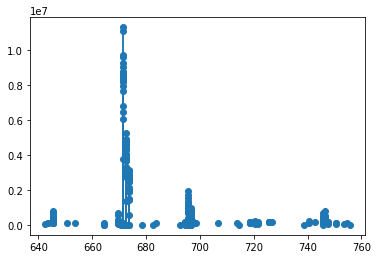

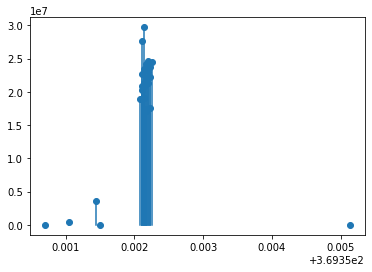

In [119]:
plt = Targets_util.lollipop_plot(pr_df.PR_m, pr_df.PR_i)
plt.show()
plt = Targets_util.lollipop_plot(fr_df.FR_m, fr_df.FR_i)
plt.show()

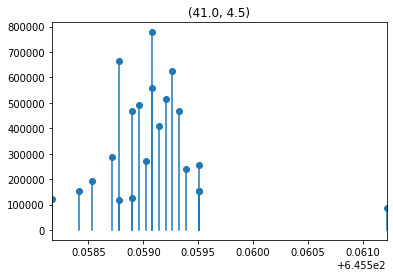

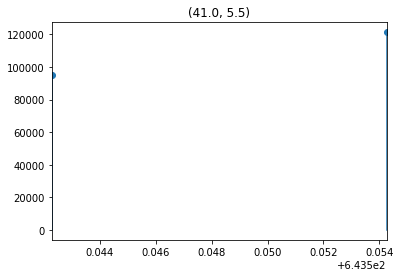

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 642.5337524414062 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


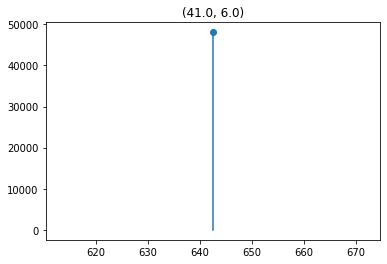

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 653.5336303710938 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


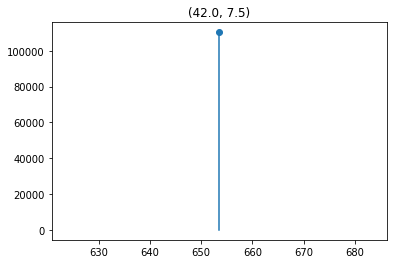

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 650.4984130859375 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


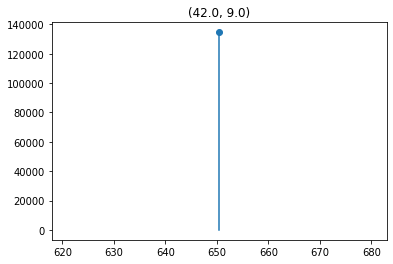

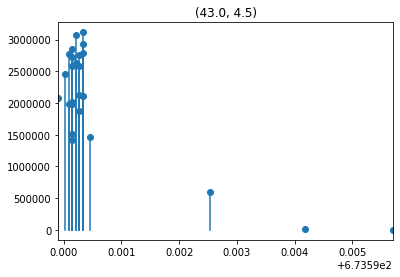

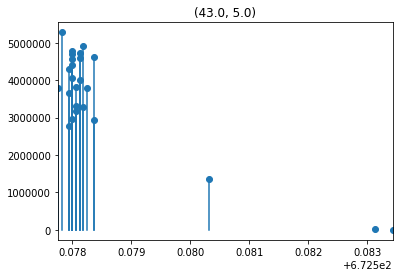

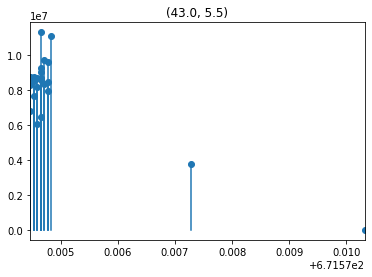

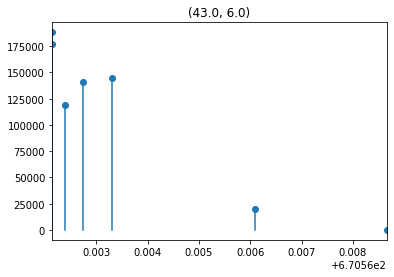

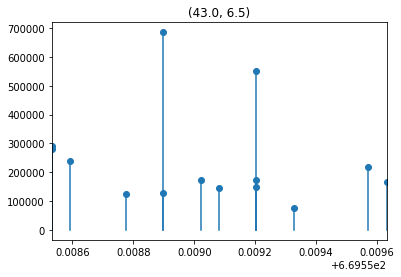

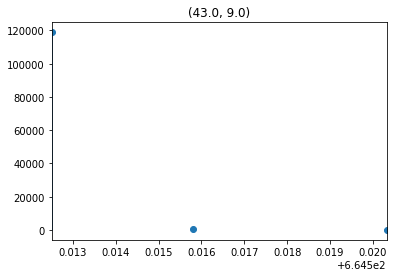

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 683.5824584960938 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


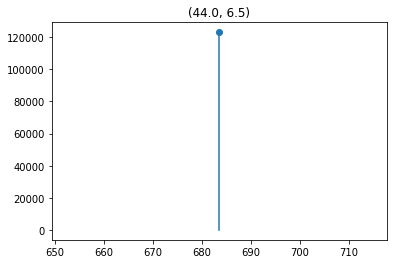

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 682.5643310546875 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


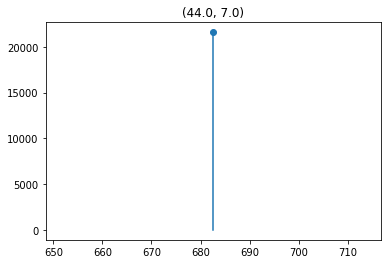

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 678.53125 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


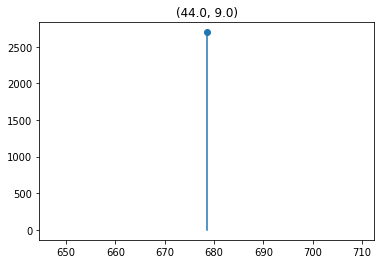

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 698.5929565429688 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


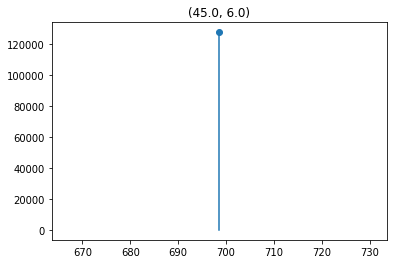

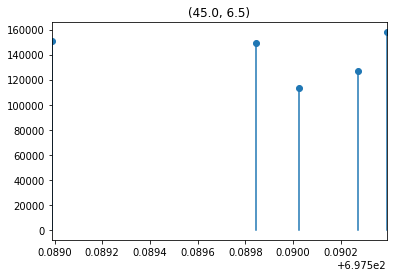

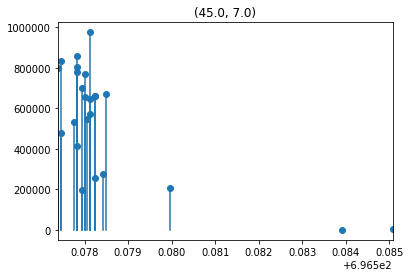

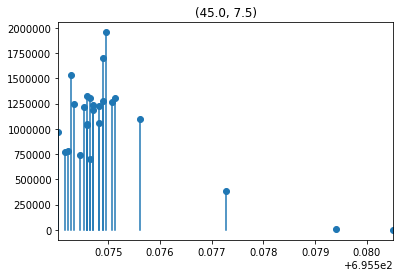

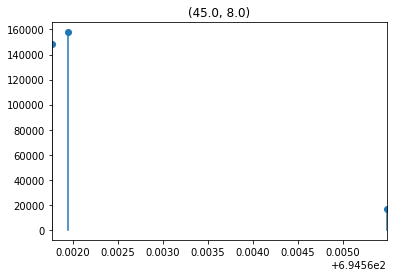

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 692.5489501953125 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


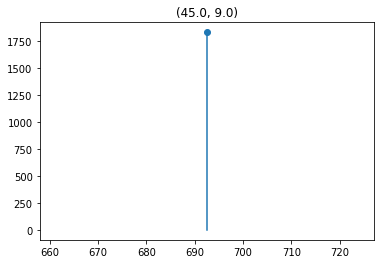

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 714.6255493164062 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


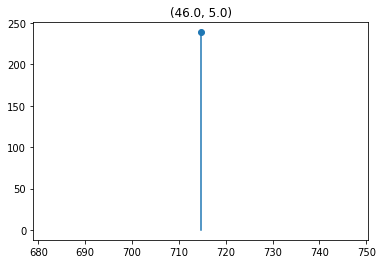

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 713.619873046875 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


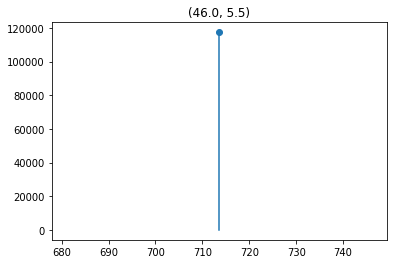

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 706.5623779296875 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


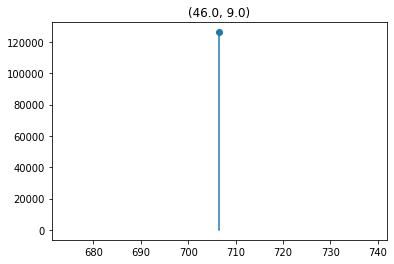

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 726.626708984375 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


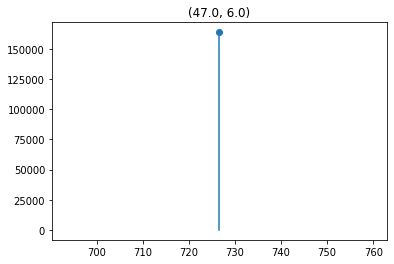

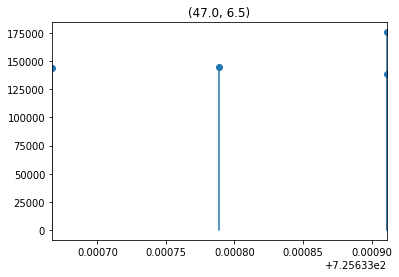

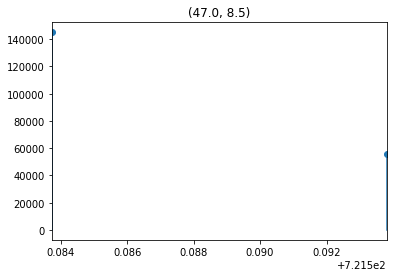

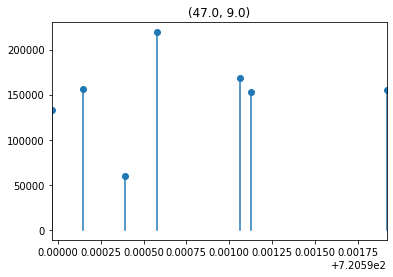

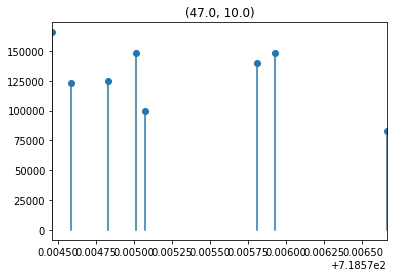

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 742.6554565429688 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


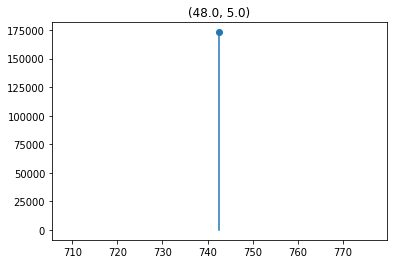

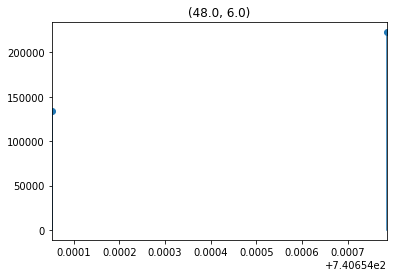

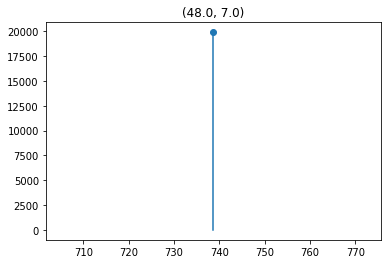

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 755.66552734375 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


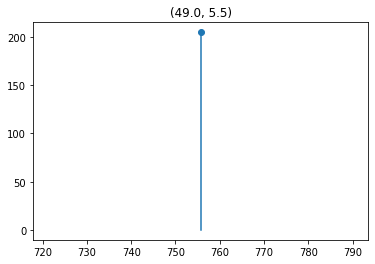

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 754.6670532226562 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


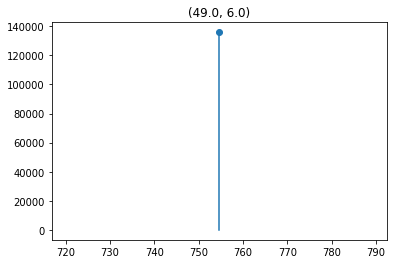

c:\Users\mirandaa\Desktop\lx128_p3\lipidxplorer\lx2\targets.py:138: UserWarning: Attempting to set identical left == right == 753.6648559570312 results in singular transformations; automatically expanding.
  plt.xlim([g_df[prefix+'m'].min(),g_df[prefix+'m'].max()])


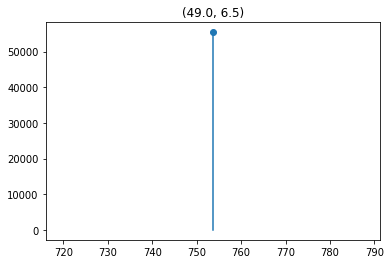

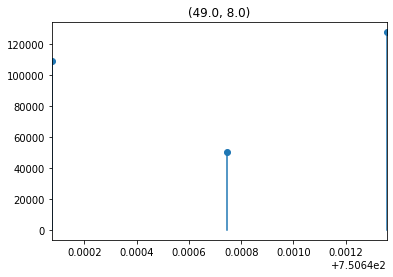

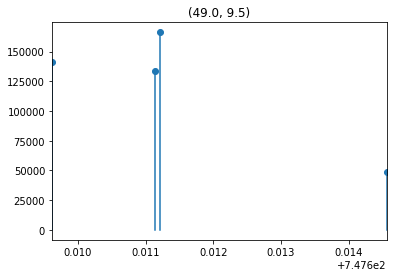

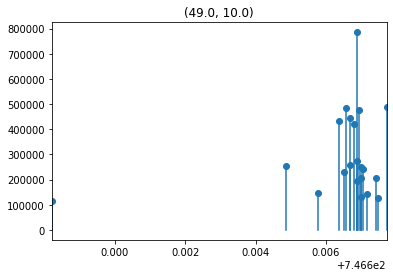

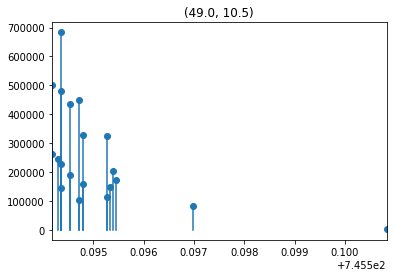

In [120]:
MFQL_util.showAll_lollipop(pr_df, sample = False)

# in the XML annotate with 'selectedIonList'